### 5.- Escriba un codigo que determine la presion de fondo en un pozo de gas con las siguiente informacion:
- La presion en la cabeza $p_{wh} = 914.7[psi]$
- La densidad es $\rho_{g} = 2.83[lb/ft^3]$
- La profundidad es $ Prof = 3000[ft]$
- Lecturas del ecometro $GWC = 2200[ft]$
- Gradiente de de agua $(\frac{dp}{d\rho_w}) = 0.4335[psi/ft]$

$$p_{ws} = p_{hw} + p_{hg} + p_{wh} $$
donde:
- $p_{hw} =$ presion hidrostatica del agua dulce
- $p_{hg} =$ presion hidrostatica del gas

#### librerias y declaracion de variables
declaracion de variables 

In [34]:
%config IPCompleter.greedy=True
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p_wh = 914.17
rho_g = 2.83
prof = 3000
GWC = 2200
rho_w = 1
grad_w = 0.4335

#### Obtencion de gradiente de gas

$$\frac{dp}{d\rho_g}=2.83\left[ \frac{lb}{ft^2} \right] * 1\left[  \frac{1}{ft} \right]  * \frac{1}{144}\left[  \frac{ft^2}{in^2} \right]$$

In [24]:
grad_g = rho_g*(1/144)
display(Math(r'\frac{dp}{d\rho_g}='),grad_g)

<IPython.core.display.Math object>

0.019652777777777776

### Calculo de profundidades

Seccion de tuberia: 
$$Profundidad_{agua} = {Profundidad_{total}}-{GWC}$$
<br>
$$Profundidad_{gas} = {GWC}$$

In [22]:
prof_w = (prof-GWC)

### Calculo de presiones hidrostaticas

In [28]:
p_hw = grad_w*(prof_w)
print("La presion hidrostatica del agua=",p_hw,"[psi]")
p_hg = grad_g*(GWC)
print("La presion hidrostatica del gas=",p_hg,"[psi]")
p_ws = p_hw + p_hg + p_wh
print("La presion de fondo =",p_ws,"[psi]")

La presion hidrostatica del agua= 346.8 [psi]
La presion hidrostatica del gas= 43.23611111111111 [psi]
La presion de fondo = 1304.206111111111 [psi]


## Graficacion 

In [70]:
pfg = np.arange(GWC)
phg = pfg*grad_g

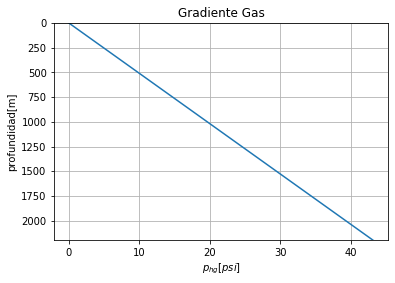

In [75]:
%matplotlib inline
fig,ax  = plt.subplots()
ax.plot(phg,pfg)
ax.set_ylim(GWC,0)
ax.set_xlabel('$p_{hg}[psi]$')
ax.set_ylabel('profundidad[m]')
ax.set_title('Gradiente Gas')
ax.grid(True)

In [61]:
pfw = np.arange(GWC,prof)
phw = pfw * grad_w

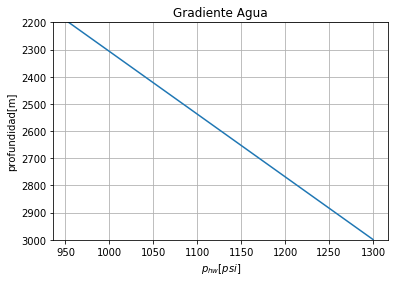

In [76]:
%matplotlib inline
fig,ax  = plt.subplots()
ax.plot(phw,pfw)
ax.set_ylim(prof,GWC)
ax.set_xlabel('$p_{hw}[psi]$')
ax.set_ylabel('profundidad[m]')
ax.set_title('Gradiente Agua')
ax.grid(True)

## Con funciones

In [106]:
p_wh = 914.17
rho_g = 2.83
prof = 3000
GWC = 2800
rho_w = 1
grad_w = 0.4335
grad_g = rho_g*(1/144)

In [110]:
def p_wss(grad_w,grad_g,prof,GWC,p_wh):
    p_hw = grad_w*(prof-GWC)
    p_hg = grad_g*(GWC)
    p_wss = p_hw + p_hg + p_wh
    return(p_wss)

In [112]:
pwss = p_wss(grad_w,grad_g,prof,GWC,p_wh)

In [113]:
print("presion de fondo =", pwss)

presion de fondo = 1055.8977777777777
